### Week 2

## Background
In this assignment, we will explore the treatment effects reported in Ferraro and Price (2013) from two perspectives. We shall answer the following two questions:
1. Does the treatment effect persist over time?
2. Are there heterogeneous treatment effects? If so, by which observable?

To make it easier to discuss the timeline, let's start with the following quote from Ferraro and Price (2013):

> "... the three treatment mailings were sent out on the same day during the week of May 21, 2007 ... by ﬁrst-class mail in ofﬁcial CCWS envelopes "

It should be safe to assume that June 2007 is the first month post intervention.

### Data description
This week, we will work with the dataset from Ferraro and Price (2013). In the dataset, each row represents one household in the experiment. The variables are labeled as the followings:
* `prem`: index of the household
* `treatment`: value 1 through 3 denotes the three treatment conditions, and value 4 denotes the control group.
* `treat1`, `treat2` and `treat3`: these are binary variables indicating the exact treatment condition.
* `jun06` ... `oct07`: these are water consumption for a given month, in thousands of gallons.
* `percent_report`: percentile for summer 2006 consumption amongst all households in Cobb County (the population, or the "universe").

In [1]:
# Load the needed libraries
import pandas as pd
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer

# Load the data
a2 = pd.read_csv('assets/assignment2.csv')

In [2]:
a2.head()

,prem,route,treatment,treat1,treat2,treat3,jun06,jul06,aug06,sep06,...,feb07,mar07,apr07,may07,jun07,jul07,aug07,sep07,oct07,percent_report
0,100004,909,4.0,0.0,0.0,0.0,3,4,6,7,...,8.0,4,5.0,6.0,5.0,5.0,5.0,6.0,4.0,36.0
1,100101,502,4.0,0.0,0.0,0.0,14,20,13,12,...,9.0,8,9.0,17.0,2.0,5.0,3.0,8.0,4.0,84.0
2,100102,502,1.0,1.0,0.0,0.0,65,23,21,8,...,5.0,4,4.0,4.0,8.0,5.0,6.0,5.0,8.0,95.0
3,100103,502,4.0,0.0,0.0,0.0,6,4,4,5,...,7.0,6,5.0,4.0,7.0,6.0,6.0,7.0,6.0,34.0
4,100105,502,4.0,0.0,0.0,0.0,4,23,33,20,...,6.0,4,5.0,6.0,10.0,15.0,8.0,15.0,12.0,91.0


In [3]:
a2.columns

Index(['prem', 'route', 'treatment', 'treat1', 'treat2', 'treat3', 'jun06',
       'jul06', 'aug06', 'sep06', 'oct06', 'nov06', 'dec06', 'jan07', 'feb07',
       'mar07', 'apr07', 'may07', 'jun07', 'jul07', 'aug07', 'sep07', 'oct07',
       'percent_report'],
      dtype='object')

## 

## Question 1: Visual representation of water consumption (5pts)
Given the monthly water consumption between June 2006 and October 2007 in the dataframe `a2`, use a "geometry" of your choice to plot the water consumptions for this time frame. You are free to choose as many facets as you would like. Please make sure to include the following in your plot:
1. Among all housholds, how are average water consumptions changing over the months? (2pts)
2. Then, for households in each treatment condition, plot the mean water consumption over the months individually. (2pts)

Lastly, briefly summarize the bifurcation that took place starting in June 2007. (1pt)


**Note**, this question will be manually graded. Please render your plot object in the body of this notebook. (Hint: you may select the relevant dataframe and apply `df_relevant.plot.line()` to reveal the plot. This is the simplest plot we expect for this question.)

### Testing:

In [4]:
# Load packages: 
import altair as alt

In [5]:
# enable correct rendering (unnecessary in later versions of Altair)
alt.renderers.enable('default')
# uses intermediate json files to speed things up
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

In [6]:
# Melt dataframe for monthyear:
a2_melt = pd.melt(id_vars = ['prem', 'route', 'percent_report', 'treat1', 'treat2', 'treat3', 'treatment'], 
                    frame= a2,
                    var_name='monthyear',
                    value_name='water_consumption')



In [7]:
a2_melt.head()

,prem,route,percent_report,treat1,treat2,treat3,treatment,monthyear,water_consumption
0,100004,909,36.0,0.0,0.0,0.0,4.0,jun06,3.0
1,100101,502,84.0,0.0,0.0,0.0,4.0,jun06,14.0
2,100102,502,95.0,1.0,0.0,0.0,1.0,jun06,65.0
3,100103,502,34.0,0.0,0.0,0.0,4.0,jun06,6.0
4,100105,502,91.0,0.0,0.0,0.0,4.0,jun06,4.0


### Implementing:

In [8]:
# Q1-1: plot and render the average water consumption over the months
# You may find the following column names helpful: 
sort_months = ['jun06', 'jul06', 'aug06', 'sep06', 'oct06', 'nov06', 'dec06',  'jan07', 'feb07', 'mar07', 'apr07', 'may07', 'jun07', 'jul07', 'aug07', 'sep07', 'oct07']


# YOUR CODE HERE
# Melt dataframe for monthyear:
a2_melt = pd.melt(id_vars = ['prem', 'route', 'percent_report', 'treat1', 'treat2', 'treat3', 'treatment'], 
                    frame= a2,
                    var_name='monthyear',
                    value_name='water_consumption')

# Average consumption of water by months: 
mean_water_consumption = a2_melt.groupby('monthyear').agg({'water_consumption':'mean'}).reset_index()

# Plot average water consumption: 
line = (alt.Chart(mean_water_consumption)
                            .mark_line()
                            .encode(x = alt.X('monthyear', sort = sort_months),
                                    y = alt.Y('water_consumption:Q',  axis = alt.Axis(title = 'average_water_consumption')))
                            .properties(width = 600))

dot = (alt.Chart(mean_water_consumption)
                            .mark_circle()
                            .encode(x = alt.X('monthyear', sort = sort_months),
                                    y = alt.Y('water_consumption:Q'), tooltip = ['monthyear' , alt.Tooltip('water_consumption:Q', format = '.2f', title= 'average consumption')])
                            .properties(width = 600, title='Average Water Consumption by Month'))



plot_average_consumption = line+dot
        
plot_average_consumption
#raise NotImplementedError()

alt.LayerChart(...)

In [9]:
# Q1-2: plot and render the average water consumption for each treatment condition (including the control) over the months

# YOUR CODE HERE
sort_months = ['jun06', 'jul06', 'aug06', 'sep06', 'oct06', 'nov06', 'dec06',  'jan07', 'feb07', 'mar07', 'apr07', 'may07', 'jun07', 'jul07', 'aug07', 'sep07', 'oct07']


# YOUR CODE HERE

# Average consumption of water by months and treatment: 
mean_water_consumption_treatment = a2_melt.groupby(['monthyear', 'treatment']).agg({'water_consumption':'mean'}).reset_index()

# Plot average water consumption: 
line_2 = (alt.Chart(mean_water_consumption_treatment)
                            .mark_line()
                            .encode(x = alt.X('monthyear', sort = sort_months),
                                    y = alt.Y('water_consumption:Q',  axis = alt.Axis(title = 'average_water_consumption')), color = alt.Color('treatment:O', scale= alt.Scale(scheme = 'cividis')))
                            .properties(width = 600))

dot_2 = (alt.Chart(mean_water_consumption_treatment)
                            .mark_circle()
                            .encode(x = alt.X('monthyear', sort = sort_months),
                                    y = alt.Y('water_consumption:Q'), 
                                    color=alt.Color('treatment:N'),
                                    tooltip = ['treatment:O','monthyear' , alt.Tooltip('water_consumption:Q', format = '.2f', title= 'average consumption')])
                            .properties(width = 600, title='Average Water Consumption by Month and Treatment'))



plot_average_consumption_treatment = line_2+dot_2
plot_average_consumption_treatment
#raise NotImplementedError()

alt.LayerChart(...)

Briefly summarize the bifurcation that took place starting in June 2007. (1pt)

YOUR ANSWER HERE

As we can see from the above chart, since Feb 2007, average water consumption has been steadily going up until June 2007, as a result it seems 3 treatment letters had to be sent out in the mail on May 21, 2007 which resulted in bifurcation in the month of June 2007, showing decline in the average water consumption thereafter, for each 3 treatments and the control group. However, treatment 3 seems to have the most decline compared to the rest, which can be seen in the above plot by hovering over the point for the month of Oct 2007. Now, we should also look at average treatment effect for each treatment. 

## Question 2: Estimate the treatment effect "over time" (6pts)
1. Estimate the treatment effect based on water consumption for each month _post intervention_, and keep track of the treatment effect estimates by building a Stargazer table called `Q2_table`. (3pts)
2. Plot how effect sizes are changing over the months that followed the intervention. Namely, plot the effect size on the y-axis for each relevant month as indicated on the x-axis. Make sure to distinguish the three treatment conditions in your plot. (2pts)
3. Lastly, briefly summarize how treatment effects changes over time. (1pt)


----

**Clarification**: It is safe to assume that the first month _post intervention_ is June 2007. For each month, consider the water consumption of the month as the outcome variable. The average treatment effect can be estimated by comparing the difference in means of water consumption in each treatment condition against the mean for the control group (treatment=4). Technically, it is safe to directly employ an OLS regression with treatment dummies and read off the coefficients for each treatment dummy as the treatment effect (of the month).

**Additional technical notes**: Since we are trying to get an estimate for the treatemnt effect for each month, it helps to control for the water consumption for the month from the previous year. When specifying your OLS regresion, make sure to include the water consumption for the same month from the previous year as a covariate.

In [10]:
# You can use the following list of months as a starting point.
months_after_treatment = ['jun07', 'jul07', 'aug07', 'sep07', 'oct07']

# Q2-1: run an OLS regression for each month and store all models sequentially as a Stargazer object.
# Please name your table as `Q2_table`.
    # Hint 1 - To produce a better estimate for the treatment effect for each
    # month, make sure to include the monthly water usage from 2006.
    # Hint 2 - It helps to render the full regression table and adjust its
    # covariates properly. This will help you to reason through Q2-2.
    # Note, you don't need to cluster the standard errors here.

# YOUR CODE HERE
# Use OLS to figure out what happens when we apply 3 different treatments to control months as per below
# fot model
model_june = smf.ols('jun07~jun06+treat1+treat2+treat3', data = a2).fit() 
model_july = smf.ols('jul07~jul06+treat1+treat2+treat3', data = a2).fit() 
model_aug = smf.ols('aug07~aug06+treat1+treat2+treat3', data = a2).fit() 
model_sept = smf.ols('sep07~sep06+treat1+treat2+treat3', data = a2).fit() 
model_oct = smf.ols('oct07~oct06+treat1+treat2+treat3', data = a2).fit() 

# Build Stargazer table: 
Q2_table = Stargazer([model_june, model_july, model_aug, model_sept, model_oct])

# Set covariaet order: 
Q2_table.covariate_order(['jun06', 'jul06', 'aug06', 'sep06', 'oct06', 'treat1', 'treat2', 'treat3', 'Intercept'])
#raise NotImplementedError()

In [11]:
Q2_table

In [12]:
# Hidden Tests, checking the values in Q2_table.

# 

In [13]:
Q2_table.model_data[0].keys()

dict_keys(['p_values', 'cov_values', 'cov_std_err', 'r2', 'r2_adj', 'f_p_value', 'degree_freedom', 'degree_freedom_resid', 'nobs', 'f_statistic', 'cov_names', 'conf_int_low_values', 'conf_int_high_values', 'resid_std_err'])

/Users/prashantsanghal/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


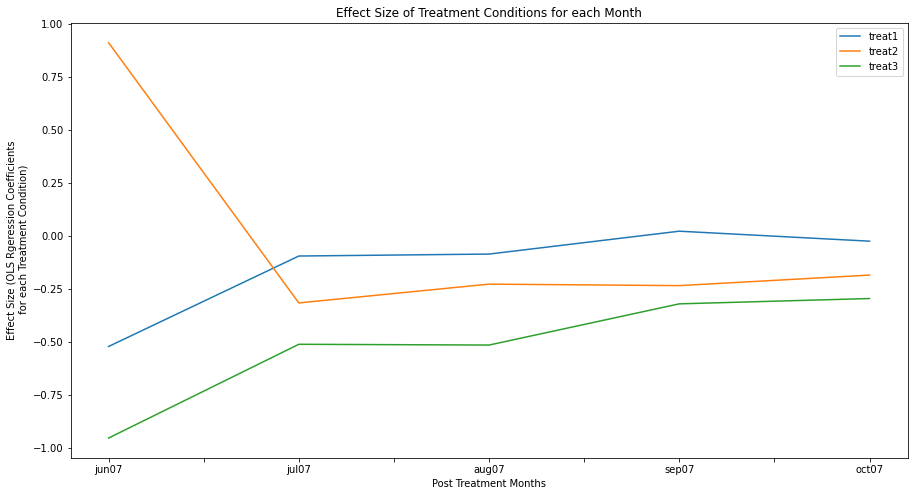

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
# Q2-2: collect coefficients from the OLS regressions and plot the effect size
# for different treatment conditions for each month.
# Hint: for each month in 2007, we obtain an estimate for the coefficient for
# each treatment condition
    # The x-axis for the plot should be: 'jun07', 'jul07', 'aug07', 'sep07', 'oct07', 
    # The y-axis for the plot should denote the "effect size" (or, coefficients
    # for treatment conditions in the OLS regression)
    
# YOUR CODE HERE
t_coeff = pd.DataFrame({i: Q2_table.model_data[i]['cov_values'][2:] for i in range(0,5)}).T
t_coeff.index = ['jun07', 'jul07', 'aug07', 'sep07', 'oct07']

# Make Plot:

_ = t_coeff.plot(figsize = (15,8))
_ = plt.ylabel('Effect Size (OLS Rgeression Coefficients\n for each Treatment Condition)')
_ = plt.xlabel('Post Treatment Months')
_ = plt.title('Effect Size of Treatment Conditions for each Month')
#raise NotImplementedError()

**Q2-3**: Recall that all the water consumption records are in thousands of gallons. Briefly summarize how treatment effects change over time. (1pt)

YOUR ANSWER HERE

A per the plot above, we can see that treatment 2 coefficient declined significantly from a high of 0.92 to -0.315 for the month of June to July 2007. While treatment 3, had the lowest coefficient value at -0.95 which saw a slight increase after receiving the treatment for the same period during June to July 2007.  
This could mean that the users of treatment 2, had the maximum room for improvement than the users of other treated groups. Example, users of treated groups 1 and 3 both showed slight increase in their regression coefficients suggesting, they may have increased their water consumption after receiving the letters.    

## Question 3: ATE for summer 2007 (4pts)
For the rest of this assignment, we will consider the treatment effect using aggreated water use for summer 2007. That is, as the dependent variable, we use this sum: `jul07  + aug07 + sep07 + oct07`

1. Estimate the average treatment effects for water usage in summer 2007, controlling for water consumption in summer and fall 2006, as well as spring (April, May) 2007. Use the helper code provided, reproduce Model A and Model B as reported in Table 2. Please name your Stagazer table as `Q3_table`. You can ignore the Model C column. (3pts)
2. Interpret the coefficient for `treat3`, the treatment dummy for "Strong social norm". (1pt)

**Note**: Q3-2 will be manually graded.

![table2](assets/Table2_Q3.png)

In [15]:
# Here are the helper scripts to get you started with the OLS regression
a2['summer_07'] = a2[['jul07', 'aug07', 'sep07', 'oct07']].sum(axis=1) # This is the outcome variable
a2['water_2006'] = a2[['jun06', 'jul06', 'aug06', 'sep06', 'oct06', 'nov06']].sum(axis=1)  # This is the first covariate
a2['apr_may_07'] = a2[['apr07', 'may07']].sum(axis=1) # This is the second covariate

# Q3-1: Estimate Model A and Model B using OLS, and collect results using Stargazer.
# Make sure to name your Stagarzer table as Q3_table.

# Please make sure the Stargazer table is rendered properly before submitting.
# Note:
    # 1. There are typos in the table, where "Water use, May-October 2006" is actually "Jun-Nov 2006".
        # And, the standard errors in your table don't have to match exactly with the standard errors from the original table.
    # 2. For Model B, be prepared for a "long" execution time. Technically, to include
        # the "fixed effect for var_x", you can add a `+C(var_x)` term into the
        # formula. Also, make sure not to include any of the estimates for a
        # specific route in your table.
    # 3. You may consider running the regressions in one cell, and render the
        # table with Stargazer in a new code cell. This can save your time from
        # repeatedly estimating the same fixed effect model when you tune the
        # regression table with Stargazer.
# YOUR CODE HERE

# Model A, Route Not fixed, fit model: 
model_a = smf.ols('summer_07~water_2006+apr_may_07+treat1+treat2+treat3', data = a2).fit()

# Model B, Route Fixed, fit model with clustered standard error:
model_b = smf.ols('summer_07~water_2006+apr_may_07+treat1+treat2+treat3+C(route)', data = a2).fit(cov_type='cluster', cov_kwds={'groups': a2['route']})
#raise NotImplementedError()

In [16]:
# Build Stargrazer Table:
Q3_table = Stargazer([model_a,model_b])

# Set Covariate Order: 
Q3_table.covariate_order(['Intercept', 'treat1', 'treat2', 'treat3', 'water_2006','apr_may_07'])

/Users/prashantsanghal/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:1834: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 394, but rank is 5
  'rank is %d' % (J, J_), ValueWarning)


In [17]:
Q3_table

In [18]:
# Hidden Tests, checking Q3_table for its "layout" and coefficients

**Q3-2**: By now, you should see the number `-1.74` as the coefficient for "treat3". Interpret what this tells you about the Strong social norm treatment condition. Please be specific about the time duration and the units.

**Note**: This question will be manually graded.

YOUR ANSWER HERE

Households randomly assigned to treatment 3 (Strong Social Norm Treatment) will save 1,740 gallons of water on an average for "Jun-Nov 2006" and "Apr-May 2007" months than those in the control group.  

## Question 4: Heterogeneous treatment effect by Summer 2006 water consumption (5pts)
Estimate the heterogeneous treatment effects, by high (above-median) and low users (below-median) based on their 2006 water consumption, controlling for water consumption in 2006, as well as spring (April, May) 2007. Table 3 examines the treatment effect by restricting the sample into Top and Bottom 50%, based on household 2006 water consumption. As noted in footnote 18, households with significantly lower water consumptions were not included in the experiment. The variable, `percent_report` < 50 indicates below-median households. 

1. Reproduce Table 3 using OLS regression and assign the Stagazer table as `Q4_table3`. (2pts)
![table3](assets/Table3_Q4.png)

2. Update the plots in Q1-1 and Q1-2 to consider two separate categories: whether the household's Summer 2006 water consumption is in the Top 50% or not. (2pts)
3. Summarize your findings of heterogeneous treatment effect by Summer 2006 water consumption based on the table you created in Q4-1 and the plots you drew in Q4-2. (1pt)

In [19]:
# Q4-1: reproduce Table 3 and assign your Stargazer tablet object as Q4_table3.
# YOUR CODE HERE
# Get bottom_50 and top_50 % households:
bottom_50 = a2[a2['percent_report']<50]
top_50 = a2[a2['percent_report']>=50]

# Model A, Bottom_50 by median percent_report, fit model using clustered standard error by route: 
model_bottom_50 = smf.ols('summer_07~water_2006+apr_may_07+treat1+treat2+treat3', data = bottom_50).fit(cov_type='cluster', cov_kwds={'groups': bottom_50['route']})

# Model B, Top_50 by median percent_report, fit model using clustered standard error by route: 
model_top_50 = smf.ols('summer_07~water_2006+apr_may_07+treat1+treat2+treat3', data = top_50).fit(cov_type='cluster', cov_kwds={'groups': top_50['route']})

# Build stargazer table: 
Q4_table3 = Stargazer([model_bottom_50,model_top_50])

# Set Covariate order as per given table: 
Q4_table3.covariate_order(['Intercept', 'treat1', 'treat2', 'treat3', 'water_2006','apr_may_07'])

#raise NotImplementedError()

In [20]:
Q4_table3

In [21]:
# Hidden Tests, check Q4_table3 object, for reproducing Table 3 from the paper.

In [23]:
# Q4-2: update the plot in Q1-1 and Q1-2

# YOUR CODE HERE
import numpy as np
#df_summer06_top50 = a2[['jul06', 'aug06', 'sep06', 'oct06', 'top_50_binary']]

a2_melt['top_50_binary'] = np.where(a2_melt['percent_report']>=50, 1, 0)


# Average consumption of water by months: 
mean_top50 = a2_melt.groupby(['monthyear','top_50_binary']).agg({'water_consumption':'mean'}).reset_index()

# Plot average water consumption: 
line_top50 = (alt.Chart(mean_top50)
                            .mark_rect()
                            .encode(x = alt.X('monthyear', sort = sort_months, axis = alt.Axis(title = '')),
                                    y = alt.Y('top_50_binary:N',  axis = alt.Axis(title = ['top_50 (binary)'])),
                                    color = alt.Color('water_consumption:Q', scale = alt.Scale(scheme = 'greys')),
                                    tooltip= ['top_50_binary:N', alt.Tooltip('water_consumption:Q', format= '0.2f')])
                            .properties(width = 600, title = 'Q4-1: Average Water Consumption by Top 50%'))
              

mean_top50_treatment = a2_melt.groupby(['monthyear','treatment','top_50_binary']).agg({'water_consumption':'mean'}).reset_index()
              
line_top50_treatment = (alt.Chart(mean_top50_treatment)
                            .mark_rect()
                            .encode(x = alt.X('monthyear', sort = sort_months),
                                    y = alt.Y('top_50_binary:N',  axis = alt.Axis(title = '')),
                                    color = alt.Color('water_consumption:Q', scale = alt.Scale(scheme = 'greys')), 
                                    tooltip= ['treatment:N', alt.Tooltip('water_consumption:Q', format= '0.2f')])
                            .properties(width = 600)
                        .transform_filter((alt.datum.water_consumption>9.73)&(alt.datum.water_consumption<18))
                        .facet(row=alt.Row('treatment:N')).properties(title=['Q4-2: Effect of Treatment on average water consumption', 'Summer_2006 vs Jun 2007 post intervention']))



plot_average_consumption_top50 = (line_top50 & line_top50_treatment).resolve_scale(color='independent')
plot_average_consumption_top50


alt.VConcatChart(...)

**Q4-3**: Summarize your findings of heterogeneous treatment effect by Summer 2006 water consumption based on the table you created in Q4-1 and the plots you drew in Q4-2. (1pt)

YOUR ANSWER HERE

From plot Q4-1, we can see that the average water consumption among top_50% households was already very high when compared to the bottom_50% households. Model A, which represents bottom_50% in Q4_table3 shows that randomly assigned households in treatment 3 would have saved only 567 gallons of water on an average for water_2006 and apr_may_07 months compared to the control group. While, Model B which represents top_50% in Q4_table3 compared to bottom_50% would have saved 2,349 gallons of water on an average for the same period as bottom_50%. Hence, applying treatment 3 on top_50% would result in most reduced water consumption on an average.    

Furthermore, from the plot Q4-2, we can see the presence of heterogeneous treatment effect, because each treatment had a varied level of water consumption savings for each month post intervention as can be seen by the fading grey colors for the months from June07-to Aug07. I tried to apply a filter in Q4-2 to show heterogeneous treatment effect.     